In [1]:
import tensorflow as tf
import numpy as np 

In [2]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x,*args , **kwargs):
        return x

In [3]:
data = np.load('data_with_labels.npz')
train= data['arr_0']/255.
labels = data['arr_1']

print(train[0])
print(labels[0])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
0


In [4]:
import matplotlib.pyplot as plt
plt.ion()

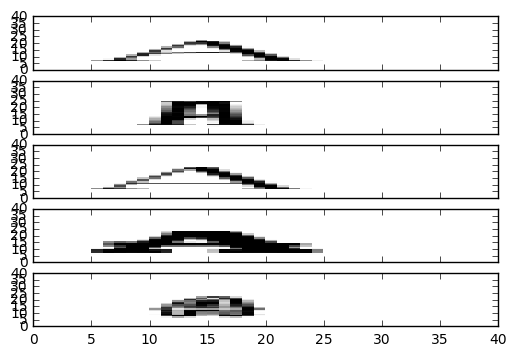

In [5]:
f,plts = plt.subplots(5,sharex=True)
c=91
for i in range(5):
    plts[i].pcolor(train[c+i*558],cmap=plt.cm.gray_r)

In [6]:
 def to_onehot(labels,nclasses=5):
        outlabels= np.zeros((len(labels),nclasses))
        for i,l in enumerate (labels):
            outlabels[i,l] = 1
        return outlabels

In [7]:
onehot = to_onehot(labels)

In [8]:
indices = np.random.permutation(train.shape[0])
valid_cnt=int(train.shape[0]*0.1)
test_idx,training_idx = indices[:valid_cnt],indices[valid_cnt:]
test,train = train[test_idx,:], train[training_idx,:]

onehot_test ,onehot_train = onehot[test_idx,:], onehot[training_idx,:]


In [9]:
sess = tf.InteractiveSession()

In [10]:
# These will be inputs
## Input pixels, flattened
x = tf.placeholder("float", [None, 1296])
## Known labels
y_ = tf.placeholder("float", [None, 5])

# Variables
W = tf.Variable(tf.zeros([1296, 5]))
b = tf.Variable(tf.zeros([5]))



In [11]:

# Just initialize
sess.run(tf.initialize_all_variables())

In [12]:
y = tf.nn.softmax(tf.matmul(x,W)+b)

In [13]:
cross_entropy  = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y+1e-50 ,y_ ))

In [14]:
train_step = tf.train.GradientDescentOptimizer(0.02).minimize(cross_entropy)

correct_prediction = tf.equal(tf.arg_max(y,1),tf.arg_max(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

In [15]:
# Actually train
epochs = 1000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs)):
    # Record summary data, and the accuracy
    if i % 10 == 0:
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={
            x: train.reshape([-1, 1296]),
            y_: onehot_train
        })
        train_acc[i//10] = A
        # And now the validation set
        A = accuracy.eval(feed_dict={
            x: test.reshape([-1,1296]),
            y_: onehot_test
        })
        test_acc[i//10] = A
    train_step.run(feed_dict={
        x: train.reshape([-1,1296]),
        y_: onehot_train
    })


0.388291507959
0.397849470377


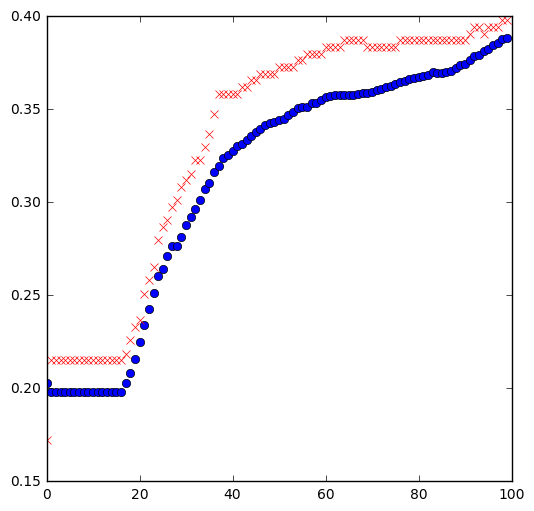

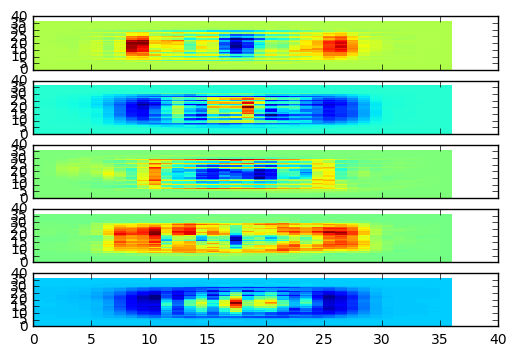

In [16]:
print(train_acc[-1])
print(test_acc[-1])

plt.figure(figsize=(6,6))
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

plt.figure(figsize=(6,6))
f,plts = plt.subplots(5,sharex=True)
for i in range(5):
    plts[i].pcolor(W.eval()[:,i].reshape([36,36]))